In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
dataset = pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')

In [4]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
dataset.describe().T.style.background_gradient(cmap='BuGn',subset=['count','mean','std','50%'])

,count,mean,std,min,25%,50%,75%,max
Year,301.000000,2013.627907,2.891554,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,301.000000,4.661296,5.082812,0.100000,0.900000,3.600000,6.000000,35.000000
Present_Price,301.000000,7.628472,8.644115,0.320000,1.200000,6.400000,9.900000,92.600000
Kms_Driven,301.000000,36947.205980,38886.883882,500.000000,15000.000000,32000.000000,48767.000000,500000.000000
Owner,301.000000,0.043189,0.247915,0.000000,0.000000,0.000000,0.000000,3.000000


In [7]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
def roundoff(mess):
    return mess/100000
dataset['Kms_Driven']=dataset['Kms_Driven'].apply(roundoff)

In [9]:
dataset.shape

(301, 9)

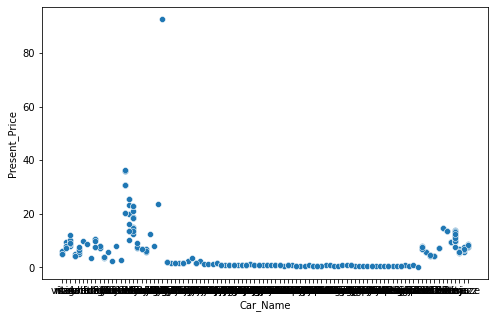

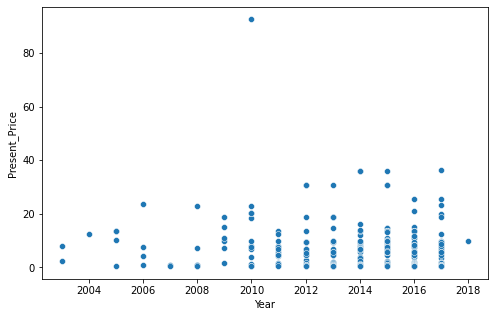

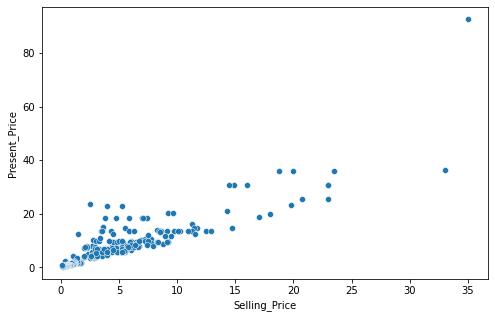

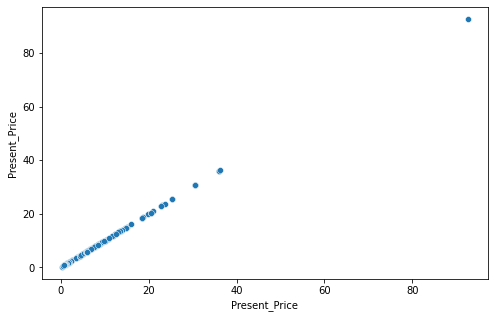

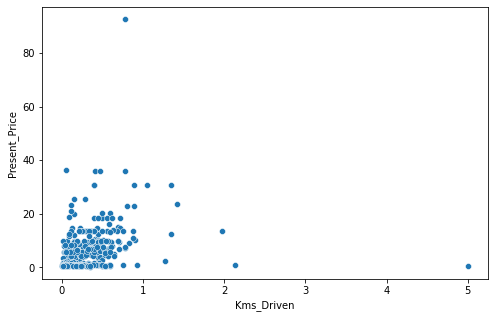

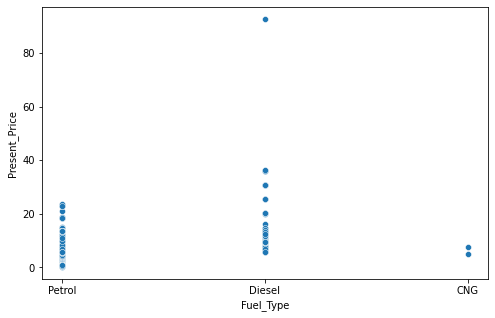

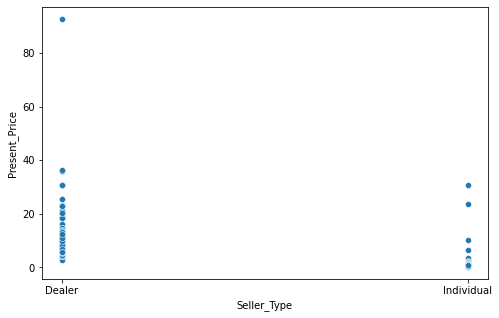

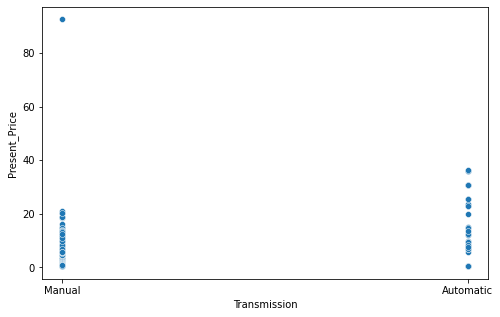

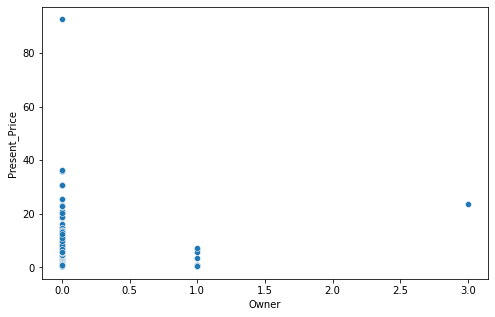

In [10]:
for i in dataset.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=i, y='Present_Price', data=dataset)

<AxesSubplot:xlabel='Transmission', ylabel='count'>

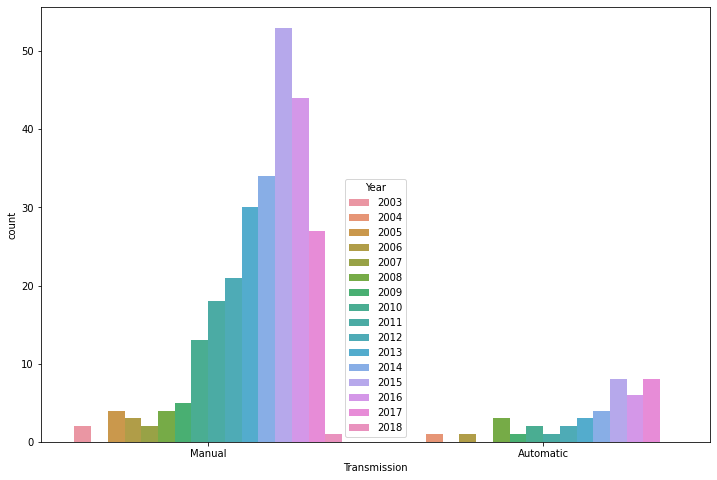

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(data=dataset,x='Transmission',hue='Year')

In [12]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
dataset['Car_Name'] = encode.fit_transform(dataset['Car_Name'])

In [13]:
categorical = [i for i in dataset.columns if dataset[i].dtypes == 'O']
categorical

['Fuel_Type', 'Seller_Type', 'Transmission']

In [14]:
fuel=pd.get_dummies(dataset['Fuel_Type'])
seller=pd.get_dummies(dataset['Seller_Type'])
transmission=pd.get_dummies(dataset['Transmission'])

In [15]:
dataset=pd.concat([dataset,fuel,seller,transmission],axis=1)

In [16]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,90,2014,3.35,5.59,0.2700,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
1,93,2013,4.75,9.54,0.4300,Diesel,Dealer,Manual,0,0,1,0,1,0,0,1
2,68,2017,7.25,9.85,0.0690,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
3,96,2011,2.85,4.15,0.0520,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
4,92,2014,4.60,6.87,0.4245,Diesel,Dealer,Manual,0,0,1,0,1,0,0,1


In [17]:
dataset.drop(['Seller_Type','Fuel_Type','Transmission'],axis=1,inplace=True)
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,90,2014,3.35,5.59,0.2700,0,0,0,1,1,0,0,1
1,93,2013,4.75,9.54,0.4300,0,0,1,0,1,0,0,1
2,68,2017,7.25,9.85,0.0690,0,0,0,1,1,0,0,1
3,96,2011,2.85,4.15,0.0520,0,0,0,1,1,0,0,1
4,92,2014,4.60,6.87,0.4245,0,0,1,0,1,0,0,1


In [18]:
X=dataset.drop('Present_Price',axis=1)
y=dataset['Present_Price']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((210, 12), (91, 12))

In [20]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)



In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [22]:
models=[RandomForestRegressor(),DecisionTreeRegressor(),LinearRegression()]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_lists=[]
score=[]
for m in models:
    score.append(cross_val_score(m, X_train, y_train, scoring='r2', cv=5).mean())
model_df=pd.DataFrame(columns=['model','score'])
model_df['model']=models
model_df['score']=score


In [23]:
model_df

,model,score
0,RandomForestRegressor(),0.756758
1,DecisionTreeRegressor(),0.466161
2,LinearRegression(),0.744586


In [24]:

param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto' ,'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
model=RandomForestRegressor()
grid_search=GridSearchCV(estimator=model,param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.5s


[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=80, m

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.3s


[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.9s
[CV] bootstrap=True, max_depth=80,

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min



[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.7s
[CV] bootstrap=True

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min



[CV] bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.9s
[CV] bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.9s
[CV] bootstrap=True, max_de

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.8min



[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.9min



[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.7s
[CV] bootstrap=Tr

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  8.9min



[CV] bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.8s
[CV] bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.8s
[CV] bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] bootstrap=False, m

[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 11.1min



[CV]  bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.5s
[CV] bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.7s
[CV] bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=Fa

[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 12.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [25]:
 grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [26]:
Rf=RandomForestRegressor(bootstrap=True,max_depth=90,max_features='auto',min_samples_leaf=3,min_samples_split=8,n_estimators=100)
Rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=90, min_samples_leaf=3, min_samples_split=8)

In [27]:
pred=Rf.predict(X_test)


In [28]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':pred})
df

,Actual,Predicted
177,0.57,0.581839
289,13.60,11.481611
228,9.40,10.909466
198,0.57,0.633050
60,18.61,11.078304
...,...,...
119,1.90,1.546308
19,7.98,5.684103
181,0.48,0.714921
79,30.61,19.930516


In [29]:
from sklearn.metrics import r2_score
score = r2_score(pred, y_test)
score*100

87.6813638773735